In [8]:
# Importing the necesssary modules

import pandas  as pd
from pandas import Timedelta

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

import seaborn as sns
sns.set()

from Backtest import *

In [9]:
# Preparing the data for use
ohlcv = pd.read_csv('data/daily_AAPL.csv', parse_dates=['timestamp']).sort_values('timestamp').set_index('timestamp')
ohlcv = ohlcv['2017-01-01':'2018-01-01']
ohlcv.head()
# Ensure dataframe looks like this before feeding into Backtesting Object

,open,high,low,close,volume
timestamp,,,,,
2017-01-03,115.80,116.3300,114.76,116.15,28781865
2017-01-04,115.85,116.5100,115.75,116.02,21118116
2017-01-05,115.92,116.8642,115.81,116.61,22193587
2017-01-06,116.78,118.1600,116.47,117.91,31751900
2017-01-09,117.95,119.4300,117.94,118.99,33561948


In [10]:
sma = Backtest(ohlcv, algo="moving_average", ini_cash=100000)
sma.run_backtest("absolute", 100, "absolute", 100)

{'duration_analyzed': '360 days 00:00:00',
 'number_of_trades': 29,
 'simple_return': '-2.858 %',
 'remaining_cash': 12527.0,
 'owned_shares': 500,
 'portfolio_value': 97142.0}

In [11]:
kalman = Backtest(ohlcv, algo="kalman", ini_cash=100000)
kalman.run_backtest("absolute", 100, "absolute", 100)

{'duration_analyzed': '360 days 00:00:00',
 'number_of_trades': 30,
 'simple_return': '8.441 %',
 'remaining_cash': 6903.0,
 'owned_shares': 600,
 'portfolio_value': 108441.0}

In [12]:
sma.trades_df.head()

,owned_shares,portfolio_value,remaining_cash,share_price,type
timestamp,,,,,
2017-03-29,100,100000.0,85632.0,143.68,buy
2017-03-30,200,100051.0,71213.0,144.19,buy
2017-03-31,300,99957.0,56841.0,143.72,buy
2017-04-03,400,99954.0,42470.0,143.71,buy
2017-04-04,500,99770.0,28145.0,143.25,buy


In [13]:
kalman.trades_df.head()

,owned_shares,portfolio_value,remaining_cash,share_price,type
timestamp,,,,,
2017-03-29,100,100000.0,85632.0,143.68,buy
2017-03-30,200,100051.0,71213.0,144.19,buy
2017-03-31,300,99957.0,56841.0,143.72,buy
2017-04-03,400,99954.0,42470.0,143.71,buy
2017-04-04,500,99770.0,28145.0,143.25,buy


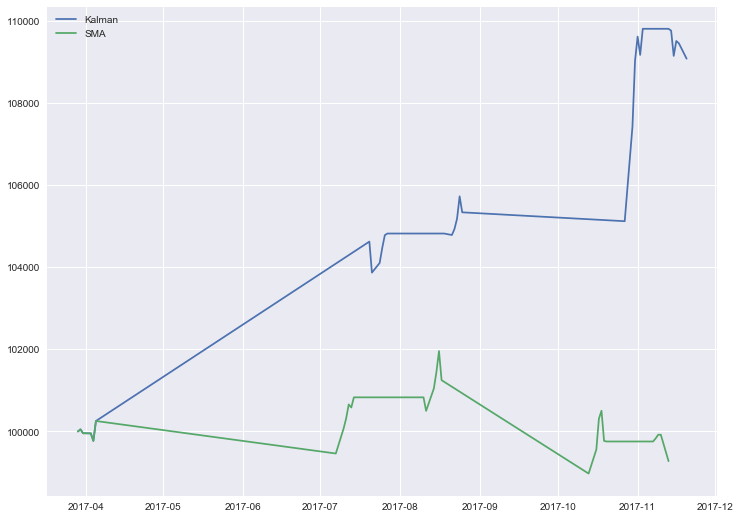

In [14]:
plt.plot(kalman.trades_df['portfolio_value'])
plt.plot(sma.trades_df['portfolio_value'])
plt.legend(["Kalman", "SMA"])
plt.show()